In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Activation, Lambda, concatenate
from keras.optimizers import SGD

from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
enc_1 = Dense(100, activation='sigmoid')
enc_2 = Dense(2, activation='sigmoid')

dec_2 = Dense(100, activation='sigmoid')
dec_1 = Dense(784, activation='sigmoid')

In [9]:
x = Input(shape=(784,))

In [10]:
enc_x = enc_1(x)
h = enc_2(enc_x)

dec_x = dec_2(h)
x_recon = dec_1(dec_x)

# VAE

In [11]:
autoencoder = Model(x, x_recon)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(loss='kullback_leibler_divergence', optimizer='Nadam')

In [14]:
autoencoder.load_weights('autoencoder_handwriting_model_weights.h5')

## submodel

In [15]:
Encoder = Model(x, h)
Encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [16]:
h_input = Input(shape=(2,))
Decoder = Model(h_input, dec_1(dec_2(h_input)))
Decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [17]:
idx = np.random.randint(x_train.shape[0])

In [18]:
idx

35012

In [19]:
x_train[idx: idx+1].shape

(1, 784)

In [20]:
print("第 %d 圖的latent 表示為 %s " %(idx, Encoder.predict(x_train[idx: idx+1])))

第 35012 圖的latent 表示為 [[0.07064126 0.10258898]] 


In [21]:
idices = np.random.randint(x_test.shape[0], size=1000)

In [22]:
idices.shape

(1000,)

In [23]:
latents = Encoder.predict(x_test[idices])

In [24]:
latents.shape

(1000, 2)

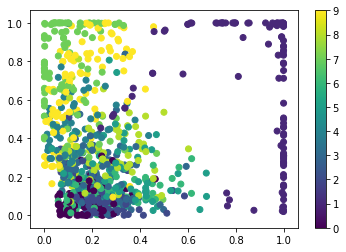

In [25]:
plt.scatter(latents[:, 0], latents[:, 1], c=y_test[idices])
plt.colorbar()
plt.show()

In [26]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [27]:
figure.shape, grid_x.shape, grid_y.shape

((420, 420), (15,), (15,))

In [28]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi,yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n - i - 1) * digit_size: (n - i) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit

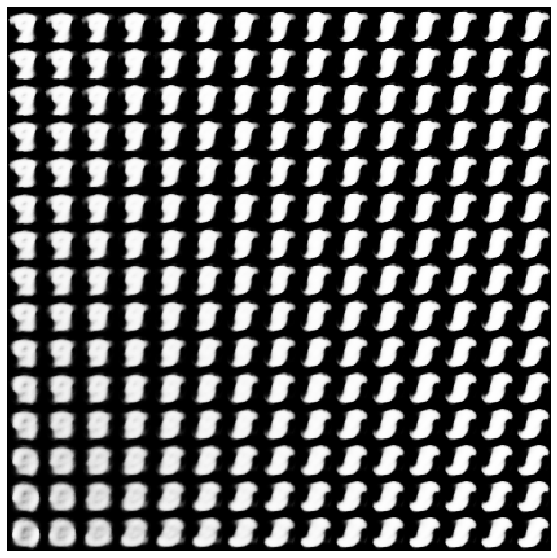

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()